## Problem Statement - Part I

A US-based housing company called *Surprise Housing* is looking at prospective properties to buy to enter the Australian market. The company has collected a data set from the sale of houses in Australia.

The company wants to:

- *Identify the variables significant in predicting the price of a house*
- *Find out how well those variables describe the price of a house*  
- Also, *determine the optimal value of lambda for ridge and lasso regression*

#### Submissions Expected:
 * __Python Notebook__: One Python notebook.
 * __Subjective Questions PDF__: A PDF containing subjective questions and answers. 

## Approach:

 - Import libraries
 - Reading and Understanding the Data
 - Feature Analysis
   - Numerical Features
     - Outlier Treatment
     - Data visualization on continuous and discrete variables
     - Missing Values Treatment
   - Categorical Features
     - Missing Values Treatment
     - Data Imputation
     - Data visualization on nominal and ordinal Features
     - Check for imbalance in data
 - Model Building
   - Linear Regression
   - Ridge Regression
   - Lasso Regression
   - Final model selection
 - Summary    
  

## Import libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import datetime

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# modelling libraries
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# automation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

## Reading and Understanding the Data

In [2]:
housing = pd.read_csv('train (1).csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Find number of records
housing.shape

# 1460 rows & 81 columns

(1460, 81)

In [4]:
# Find info of features in the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Descriptive statistics
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Feature Analysis

*As it would be cumbersome to analyse all 81 features one by one, let's group them into numerical & categorical features and perform analysis separately.*

##### Split features into numerial & categorical

In [6]:
df_numeric = housing.select_dtypes(include=['int64', 'float64'])
df_categorical = housing.select_dtypes(include=['object'])

### Numerical Features

##### Numerical Features

In [7]:
df_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Detecting Outliers

Calculate Outliers for each numerical feature (in %)

In [8]:
outliers_percentage = {}

for feature in df_numeric.columns:
    IQR = df_numeric[feature].quantile(.75)-df_numeric[feature].quantile(.25)
    outliers_count = df_numeric[(df_numeric[feature] > (df_numeric[feature].quantile(.75)+1.5*IQR)) | (
        df_numeric[feature] < (df_numeric[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature] = round(
        outliers_count/df_numeric.shape[0]*100, 2)

outlier_df = pd.DataFrame({'Features': list(
    outliers_percentage.keys()), 'Percentage': list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


*Observation:*
 - 17 off 19 numerical features have outliers.
 - As we have a high percentage of outliers, it's wise *not* to drop them to avoid losing out on useful information.

### Outlier Treatment

Reassign data outside the Inter Quartile Range

**Inter Quartile Range (IQR)** = *Difference between 75th percentile and 25th percentile values of a feature*

In [9]:
# Equate all values outside IQR to the minimum and maximun values
# Values < 25th percentile - 1.5 * IQR ==> Lowest data point in the data set excluding any outliers
# Values > 75th percentile + 1.5 * IQR ==> Highest data point in the data set excluding any outliers
# Exclude the response variable
for feature in outliers_percentage.keys():
    if feature != 'SalePrice':
        IQR = housing[feature].quantile(.75) - housing[feature].quantile(.25)
        max_value = housing[feature].quantile(.75)+1.5*IQR
        min_value = housing[feature].quantile(.25)-1.5*IQR
        housing[feature][housing[feature] < min_value ] = min_value
        housing[feature][housing[feature] > max_value] = max_value

In [10]:
# Get the descriptive statistics again
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


*Observation:*
- Some features like, 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal' have 0 variance.
- Some are categorical variables - 'MSSubClass', 'OverallCond', 'OverallQual'.
- 'YearBuilt', 'YearRemodAdd', 'YrSold' are date columns.


### Find relation through data visualization

##### Continuous Variables

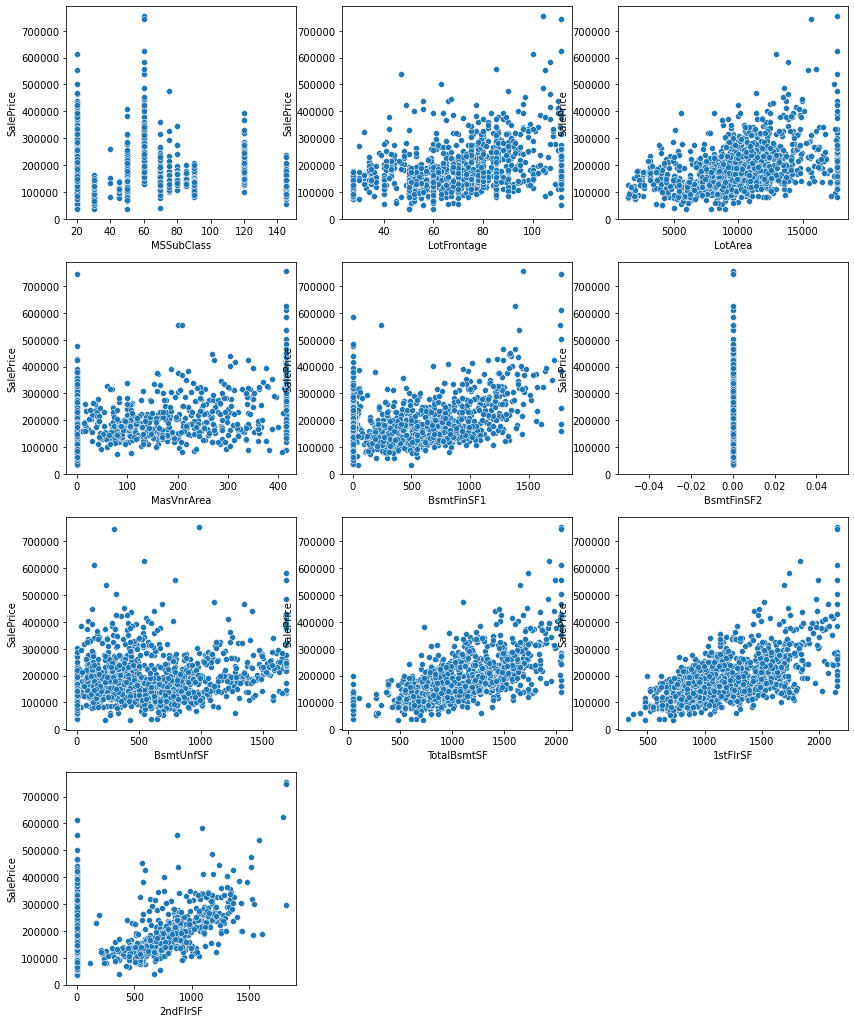

In [11]:
fig=plt.subplots(figsize=(14, 18))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(housing[feature], housing['SalePrice'])


*Observation:*
- 'MSSubClass' has discrete values.
- 'BsmtSF2' has only one value.
- Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF' show some positive correlation with 'SalePrice'.

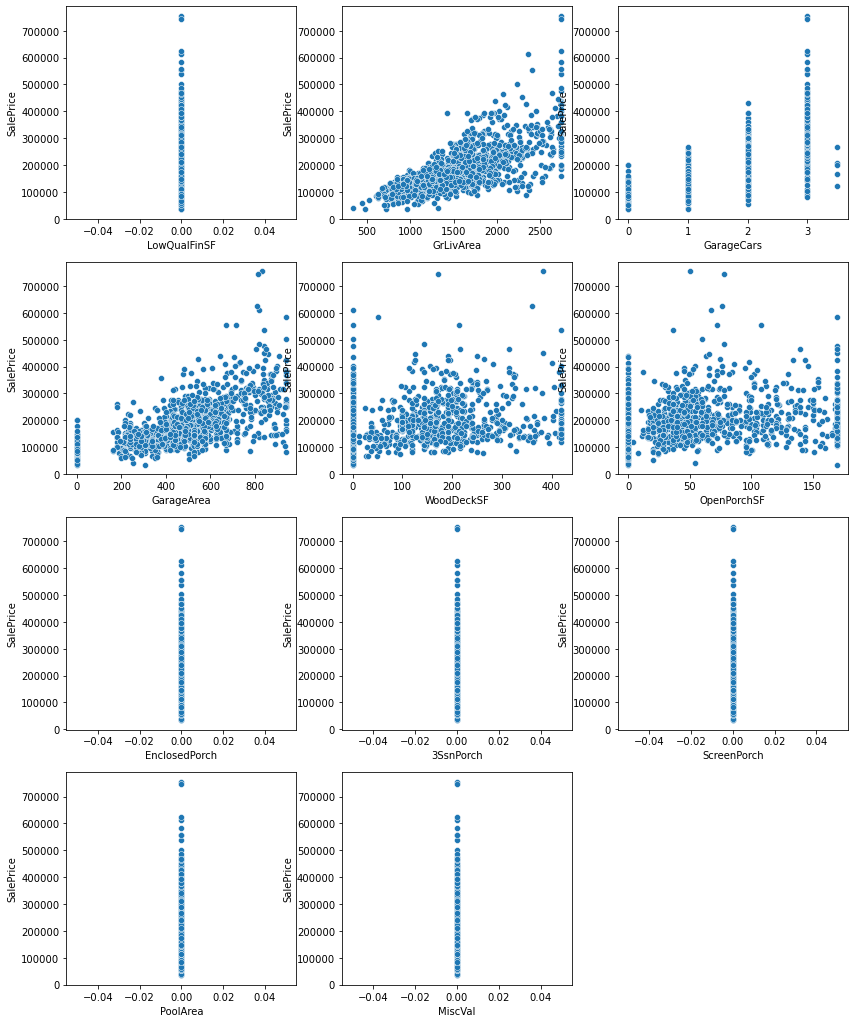

In [12]:
fig=plt.subplots(figsize=(14, 18))

for i, feature in enumerate(['LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(housing[feature], housing['SalePrice'])


*Observation:*
- Features like 'GrLivArea', 'GarageArea' show some positive correlation with 'SalePrice'.
- 'GarageCars' is a categorical feature.
- 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal' have only one value suggesting they don't have influence on the response variable.

### Distribution of SalesPrice

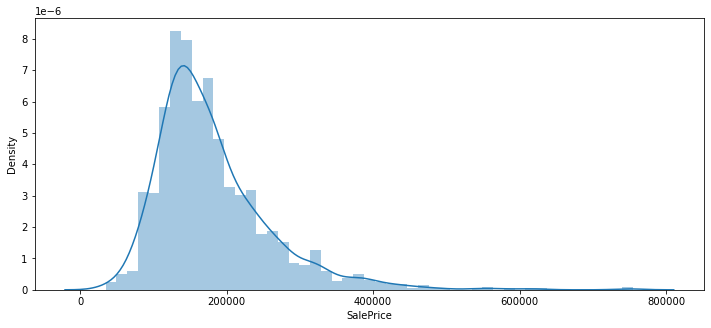

In [13]:
# Plot a distribution chart of 'SalePrice'
plt.figure(figsize=(12, 5))
sns.distplot(housing['SalePrice'])
plt.show()

*Observation:*
- The target variable is *right skewed*.

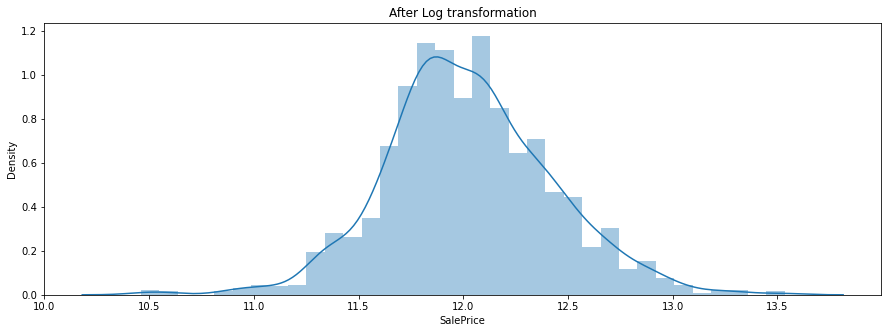

In [14]:
# # Plot a distribution chart of log of 'SalePrice'
plt.figure(figsize=(15, 5))
sns.distplot(np.log(housing['SalePrice']))
plt.title('After Log transformation')
plt.show()

*Observation:*
- Taking the log value of 'SalePrice' seems to have made it normally distributed around the center.

Re-plotting using the log value of SalePrice against the variables that showed some linear relationship earlier

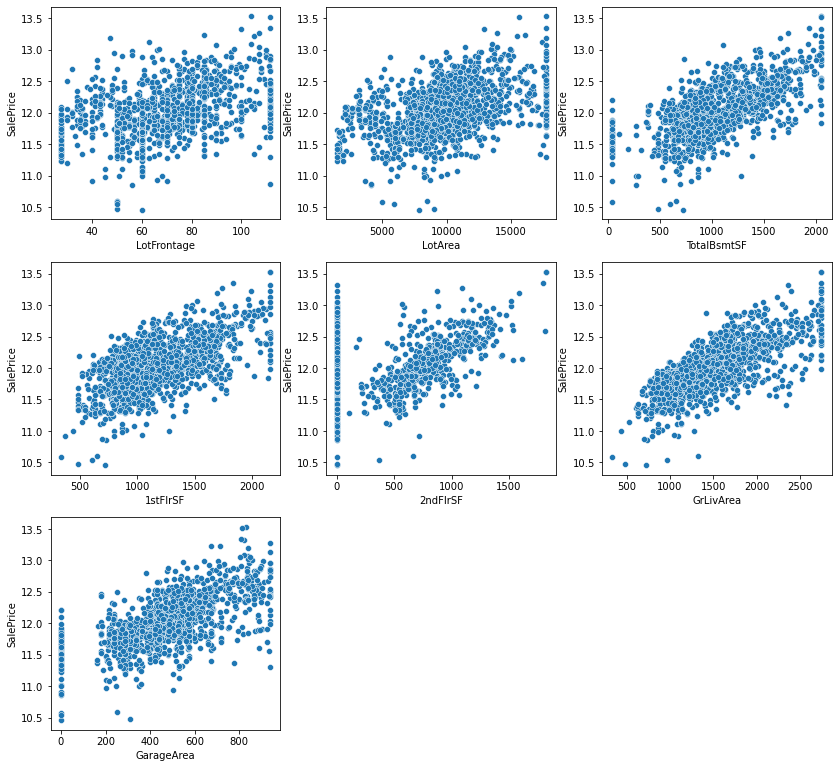

In [15]:
fig=plt.subplots(figsize=(14, 18))

for i, feature in enumerate(['LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea']):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(housing[feature], np.log(housing['SalePrice']))

*Observation:*
- A more pronounced linear relationship can be seen for all these variables - 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea' now. So we'll keep using the log(SalePrice) from here upon.

In [16]:
# 'SalePrice' is now log('SalePrice')
housing['SalePrice']=np.log(housing['SalePrice']) 

### Look for Correlation

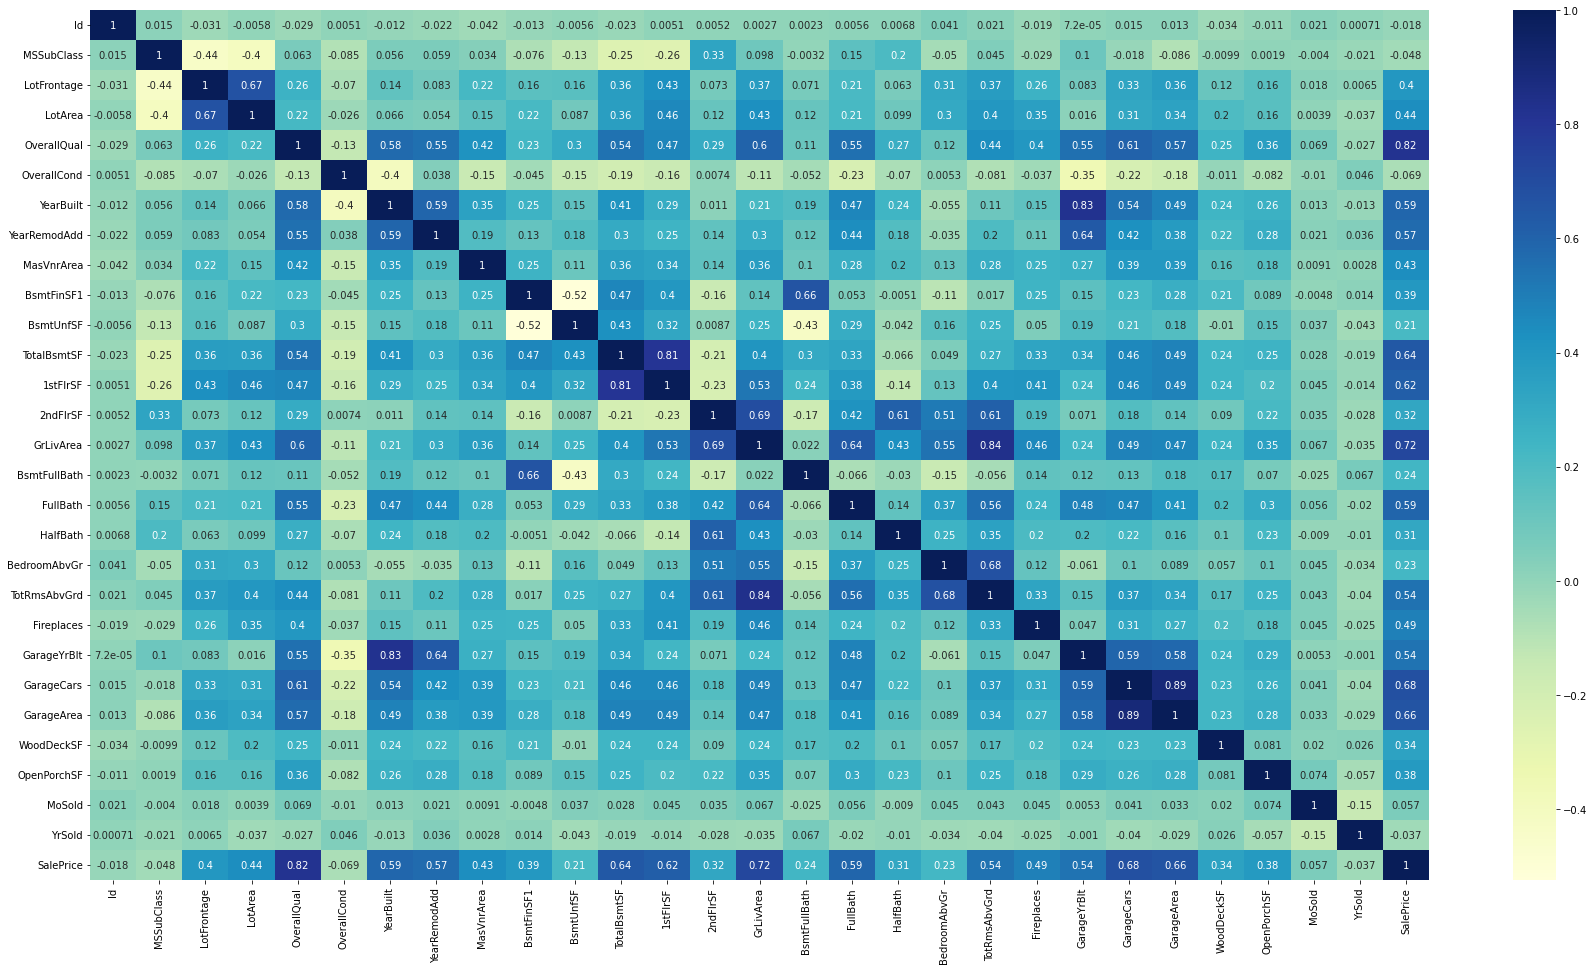

In [17]:
# Draw Heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(housing.loc[:, ~housing.columns.isin(['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr'])].corr(), cmap="YlGnBu", annot=True)
plt.show()

Here, I have excluded to consider those features that show up blank in heat map.

*Observations* - 
- 'SalePrice' and 'OverallQual' share high positive correlation - better the finish/quality, higher the price.
- 'YearBuilt' and 'GarageYrBlt' have high correlation between them - Usually the garage is built at the same time as the house.
- '1stFlrSF' is correlated with the 'TotalBsmntSF' - the size of the first floor will depend on the size of total basement area.
- 'TotalBsmntSF', '1stFlrSF', 'GrLivArea', 'GarageArea' show strong positive correlation with 'SalePrice'  - bigger the basement area, bigger the living area and area of first floor, higher the sale price.
- 'GarageArea' (Size of garage in square feet) and 'GarageCars' (Size of garage in car capacity) have high correlation as both mean the same thing in different units.
- 'GrLivArea' and 'TotRmsAbvGrd' also show good correlation.

Analyse the features that came up as blank in HeatMap

In [18]:
housing[['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr']].describe().T

,count,mean,std,min,25%,50%,75%,max
EnclosedPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3SsnPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ScreenPorch,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PoolArea,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MiscVal,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtFinSF2,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LowQualFinSF,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BsmtHalfBath,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KitchenAbvGr,1460.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


As seen above, drop these features that have fixed values and 0 variance.

In [19]:
housing.drop(columns=['EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr'], inplace=True)

*As already seen from the heatmap -*

- GarageCars and GarageArea (correlation coefficient = 0.89), drop GarageCars
- GarageYrBlt and YearBuilt (correlation coefficient = 0.83), remove GarageYrBlt
- TotRmsAbvGrd and GrLivArea (correlation coefficient = 0.83), take out GrLivArea
- TotalBsmtSF and 1stflrSF (correlation coefficient = 0.81), eliminate TotalBsmtSF

Drop these highly correlated features like 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'

In [20]:
housing.drop(columns=['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'Id'], inplace=True)
# Also, dropped the redundant 'Id' column

Get remaining features

In [21]:
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice

##### Discrete Variables

Let's now analyse the discrete variables picked out from reading the data dictionary.

In [22]:
housing[['OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'FullBath', 'HalfBath',
         'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YearBuilt', 'YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,2,1,3.0,8,0.0,2003,2003
1,6,7.5,5,2007,2,0,3.0,6,1.0,1976,1976
2,7,5.0,9,2008,2,1,3.0,6,1.0,2001,2002
3,7,5.0,2,2006,1,0,3.0,7,1.0,1915,1970
4,8,5.0,12,2008,2,1,4.0,9,1.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,2,1,3.0,7,1.0,1999,2000
1456,6,6.0,2,2010,2,0,3.0,7,2.0,1978,1988
1457,7,7.5,5,2010,2,0,4.0,9,2.0,1941,2006
1458,5,6.0,4,2010,1,0,2.0,5,0.0,1950,1996


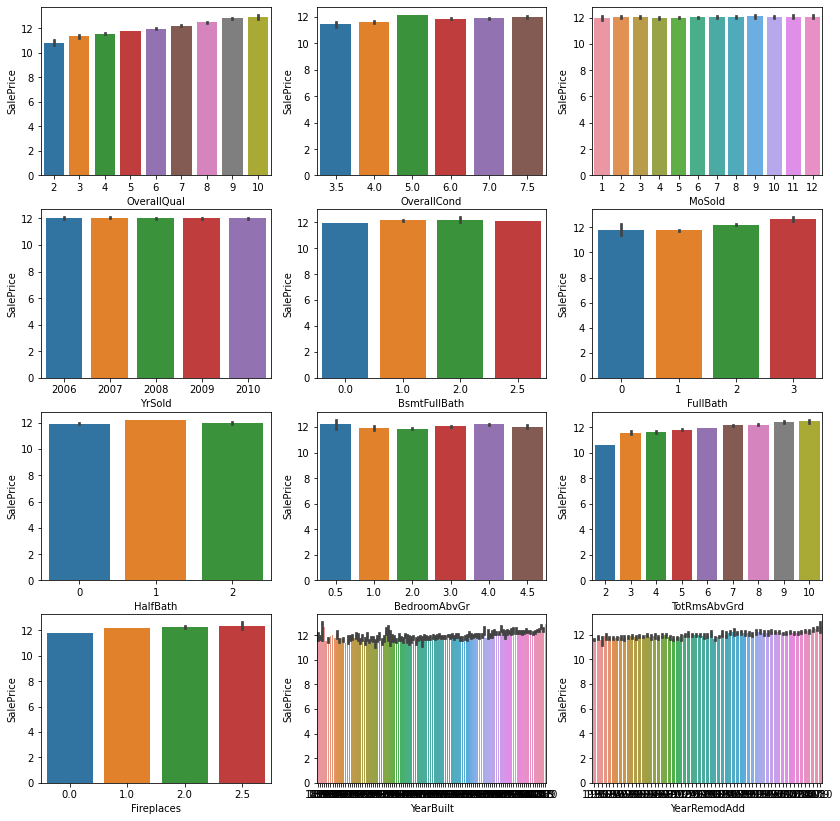

In [23]:
fig = plt.subplots(figsize=(14, 18))

for i, feature in enumerate(['OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'YearBuilt', 'YearRemodAdd']):
    plt.subplot(5, 3, i+1)
    sns.barplot(housing[feature], housing['SalePrice'])

*Observations:*
 - 'SalePrice' goes up as the 'OverallQual' rises.
 - 'OverallCond' with 5.0 has higher selling price.
 - Houses with 1 halfbath and 3 FullBath show higher selling rates.
 - 'MoSold', 'YrSold' have no influence on SalePrice.
 - Prices shoot up as the number of total rooms above grade, i.e. 'TotRmsAbvGrd', increases. Same trend observed for houses with 'Fireplaces' and 'FullBath'.
 - 0.5 and 4 bedroom houses also increase the sale price of a house.

##### Features with Years

Let's now look at features with Years

- YearBuilt: Original construction date
- YrSold: Year Sold
- YearRemodAdd: Remodel date
- GarageYrBlt: Year garage was built

In [24]:
# Descriptive Statistics
housing[['YearBuilt','YearRemodAdd', 'YrSold']].describe()

,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000
mean,1971.299315,1984.865753,2007.815753
std,30.108397,20.645407,1.328095
min,1885.000000,1950.000000,2006.000000
25%,1954.000000,1967.000000,2007.000000
50%,1973.000000,1994.000000,2008.000000
75%,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000


##### Sanity Checks

YearBuilt should be less than YrSold

In [25]:
(housing.YearBuilt > housing.YrSold).sum()

0

YearBuilt should be less than YearRemodAdd

In [26]:
(housing.YearRemodAdd < housing.YearBuilt).sum()

0

YearRemodAdd should be less than YrSold

In [27]:
(housing.YearRemodAdd > housing.YrSold).sum()

1

Here one record has the Remodelling Date that comes after the house was sold

In [28]:
print('Remodel Date:', housing[housing.YearRemodAdd>housing.YrSold].YearRemodAdd.values)
print('Year Sold:', housing[housing.YearRemodAdd>housing.YrSold].YrSold.values)

Remodel Date: [2008]
Year Sold: [2007]


Drop this erroneous record

In [29]:
housing = housing[housing.YearRemodAdd <= housing.YrSold]

In [30]:
housing.shape

(1459, 67)

##### Converting Years to Age 

It makes more sense to compare the *age* of a building rather than the year it was built.

In [31]:
# Calculate Age and reassign it to the Year for each of these features
for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing[feature] = datetime.date.today().year - housing[feature]

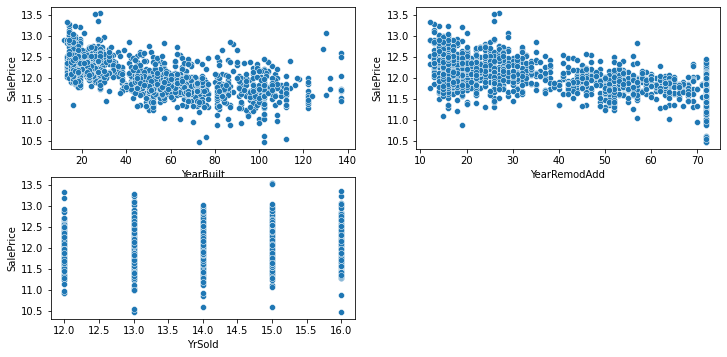

In [32]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(housing[feature], housing['SalePrice'])

*Observations:*
 - 'SalePrice' goes down as the house gets older evident from 'YearBuilt' and 'YearRemodAdd'.
 - 'OverallCond' with 5.0 has higher selling price.
 - YrSold does not show any significant trend.

### Missing Values Treatment

#### Numerical Features

In [33]:
missing_percentage = {}

for feature in housing.select_dtypes(exclude=['object']).columns:
    if housing[feature].isna().any():
        missing_percentage[feature] = round(
            housing[feature].isna().sum()/len(housing) * 100, 2)

missing_df = pd.DataFrame({'Features': list(
    missing_percentage.keys()), 'Percentage': list(missing_percentage.values())})
missing_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
0,LotFrontage,17.75
1,MasVnrArea,0.55


##### MasVnrArea

Drop rows with missing records of 'MasVnrArea' as it's less than 1% of the total records

In [34]:
housing = housing[~housing['MasVnrArea'].isna()]

##### LotFrontage

More than 17% of the data is missing so we can't remove them all.  
Let's check the distribution.

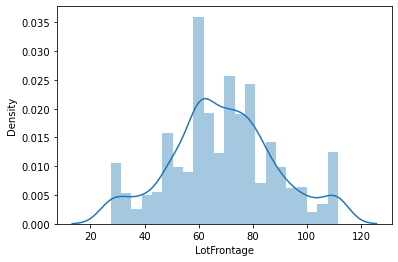

In [35]:
sns.distplot(housing.LotFrontage)
plt.show()

*Observation:*
- It has low outliers, and the distribution of the data is right-skewed.

Since the data distribution is not exactly normal, let's replace NA values with median value of this column.

In [36]:
housing.LotFrontage.replace(np.nan, housing.LotFrontage.median(), inplace=True)

In [37]:
housing.LotFrontage.isna().sum()

0

In [38]:
housing.shape

(1451, 67)

### Categorical Features

In [39]:
df_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

##### Missing Value Treatment

In [40]:
missing_percentage = {}

for feature in housing.select_dtypes(include=['object']).columns:
    if housing[feature].isna().any():
        missing_percentage[feature] = round(
            housing[feature].isna().sum()/len(housing) * 100, 2)

missing_df = pd.DataFrame({'Features': list(
    missing_percentage.keys()), 'Percentage': list(missing_percentage.values())})
missing_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
12,PoolQC,99.52
14,MiscFeature,96.28
0,Alley,93.80
13,Fence,80.63
7,FireplaceQu,47.28
8,GarageType,5.58
9,GarageFinish,5.58
10,GarageQual,5.58
11,GarageCond,5.58
3,BsmtExposure,2.62


*Observation:*
- 'PoolQC' has over 99.5% missing values while 'Electrical' has less than 1% missing records against total records.
- For 'Alley', NA = 'No access to alley'  
- NA is 'No Basement' for 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' 
- Similarly, for 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', NA denotes 'No Garage'
- For 'FireplaceQu' and 'Fence' NA means 'No Fire place' and 'No fence'.
- MiscFeature - NA says No miscellaneous features present.

All these features will be imputed with meaningful values in place of missing data.

In [41]:
# Drop 'PoolQC' feature as 99.99% of the houses have 'No Pool'
housing.drop(columns='PoolQC', inplace=True)

In [42]:
# Drop records with missing records of 'Electrical'
housing = housing[~housing['Electrical'].isna()]

In [43]:
housing.shape

(1450, 66)

##### Data Imputation

In [44]:
# Find missing records for all the categorical features
df_categorical_missing = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
housing[df_categorical_missing].isna().sum().sort_values(ascending=False)

MiscFeature     1396
Alley           1360
Fence           1169
FireplaceQu      685
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
dtype: int64

In [45]:
# Impute NA values as "Not Applicable"
housing[df_categorical_missing] = housing[df_categorical_missing].apply(lambda x: x.fillna(value='Not Applicable'))

In [46]:
# Cross check for missing values post imputation
print(housing[df_categorical_missing].isna().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [47]:
housing.shape

(1450, 66)

##### Ordinal Features

(collected by looking at data dictionary)

'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

##### Nominal Features

'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

As we will have to compare SalePrice against every categorical value using a boxplot let's write a function for it.

Function to draw a boxplot

In [48]:
# SalesPrice against Categorical Feature
def draw_boxplot(features):
    fig = plt.subplots(figsize=(20, 14))
    for i, feature in enumerate(features):
        plt.subplot(4, 2, i+1)
        sns.boxplot(housing[feature], housing['SalePrice'])

As we have so many categorical features to analyse, let's group them & examine each group

##### Exterior Features

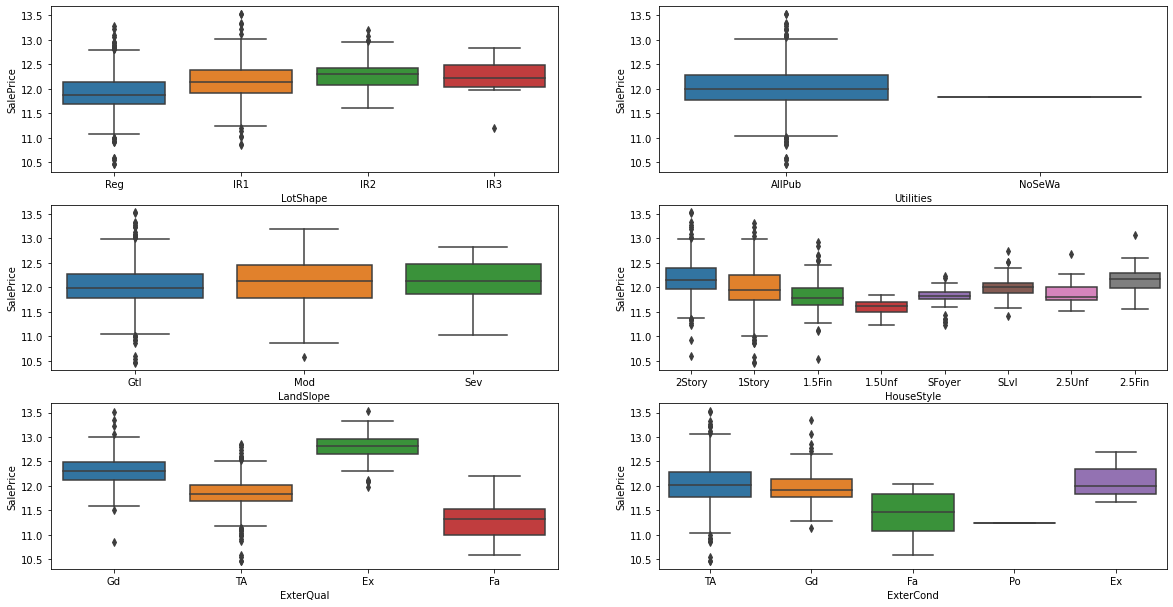

In [49]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
draw_boxplot(ext_features)

*Observations:*
- Irregularly shaped lots have higher prices than regular shaped properties.
- Majority of the houses have all public Utilities.
- Prices of plots with gentle slopes are centered around the median while moderate and severe sloped houses have higher selling price.
- Two storied houses have the highest selling price while 1.5 story  house with 2nd level finished have the lowest price.
- Houses with excellent quality and condition of material on the exterior have the highest sale price.

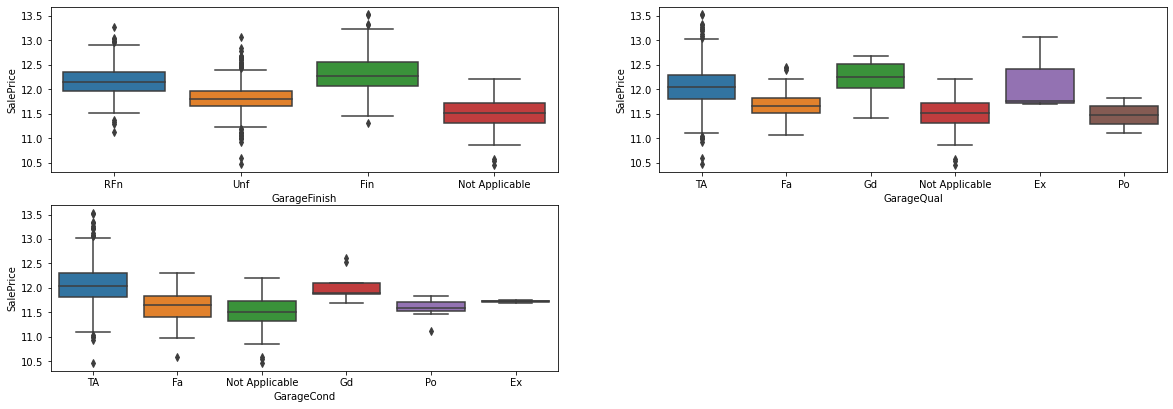

In [50]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']
draw_boxplot(garage_features)

*Observations:*
- Sales price climbs up from unfinished garage to a finished garage.
- Higher selling price for houses with good and excellent garage quality and lowest prices for houses with no garages.
- Only few houses have excellect garage condition.

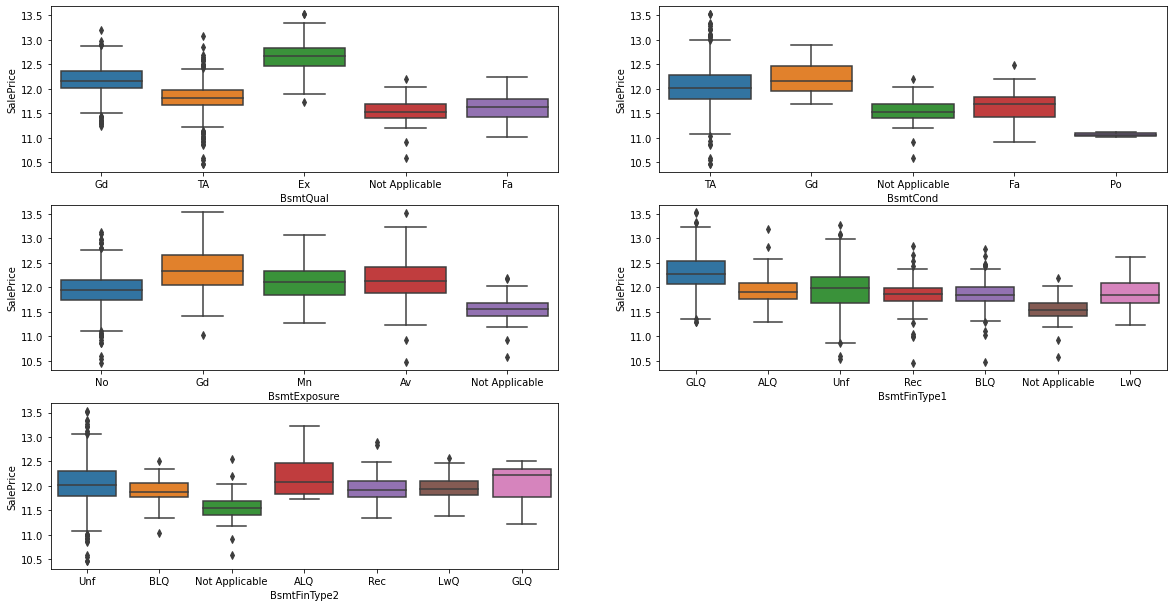

In [51]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
draw_boxplot(basement_features)

*Observations:*
- Sale price highest for houses with excellent basement quality.
- Properties with Good and typical basement conditions have higher selling price compared to basements with cracks.
- Prices high for basements that have good exposure.
- Houses with good living quarter basements have higher prices.
- Properties with basements with an average Type 2 Living Quarters also have good selling prices.

##### Re-mapping the Categorical columns

Assign numerical values to categories

In [52]:
housing['LotShape'] = housing['LotShape'].map(
    {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3})
housing['Utilities'] = housing['Utilities'].map(
    {'AllPub': 3, 'NoSewr': 2, 'NoSeWa': 1, 'ELO': 0})
housing['LandSlope'] = housing['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
housing['HouseStyle'] = housing['HouseStyle'].map(
    {'1Story': 0, '1.5Unf': 1, '1.5Fin': 2,  '2Story': 3, '2.5Unf': 4, '2.5Fin': 5, 'SFoyer': 6, 'SLvl': 7})
housing['ExterQual'] = housing['ExterQual'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['ExterCond'] = housing['ExterCond'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['BsmtQual'] = housing['BsmtQual'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['BsmtCond'] = housing['BsmtCond'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['BsmtExposure'] = housing['BsmtExposure'].map(
    {'Not Applicable': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
housing['BsmtFinType1'] = housing['BsmtFinType1'].map(
    {'Not Applicable': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
housing['BsmtFinType2'] = housing['BsmtFinType2'].map(
    {'Not Applicable': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
housing['HeatingQC'] = housing['HeatingQC'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['CentralAir'] = housing['CentralAir'].map({'N': 0, 'Y': 1})
housing['KitchenQual'] = housing['KitchenQual'].map(
    {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
housing['GarageFinish'] = housing['GarageFinish'].map(
    {'Not Applicable': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
housing['GarageQual'] = housing['GarageQual'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['GarageCond'] = housing['GarageCond'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
housing['Functional'] = housing['Functional'].map(
    {'Typ': 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6, 'Sal': 7})
housing['FireplaceQu'] = housing['FireplaceQu'].map(
    {'Not Applicable': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [53]:
housing[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1450 non-null   int64
 1   Utilities     1450 non-null   int64
 2   LandSlope     1450 non-null   int64
 3   HouseStyle    1450 non-null   int64
 4   ExterQual     1450 non-null   int64
 5   ExterCond     1450 non-null   int64
 6   BsmtQual      1450 non-null   int64
 7   BsmtCond      1450 non-null   int64
 8   BsmtExposure  1450 non-null   int64
 9   BsmtFinType1  1450 non-null   int64
 10  BsmtFinType2  1450 non-null   int64
 11  HeatingQC     1450 non-null   int64
 12  KitchenQual   1450 non-null   int64
 13  Functional    1450 non-null   int64
 14  FireplaceQu   1450 non-null   int64
 15  GarageFinish  1450 non-null   int64
 16  GarageQual    1450 non-null   int64
 17  GarageCond    1450 non-null   int64
dtypes: int64(18)
memory usage: 215.2 KB


In [54]:
housing.shape

(1450, 66)

##### Nominal Features

In [55]:
nominal_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

Let's analyse few at a time

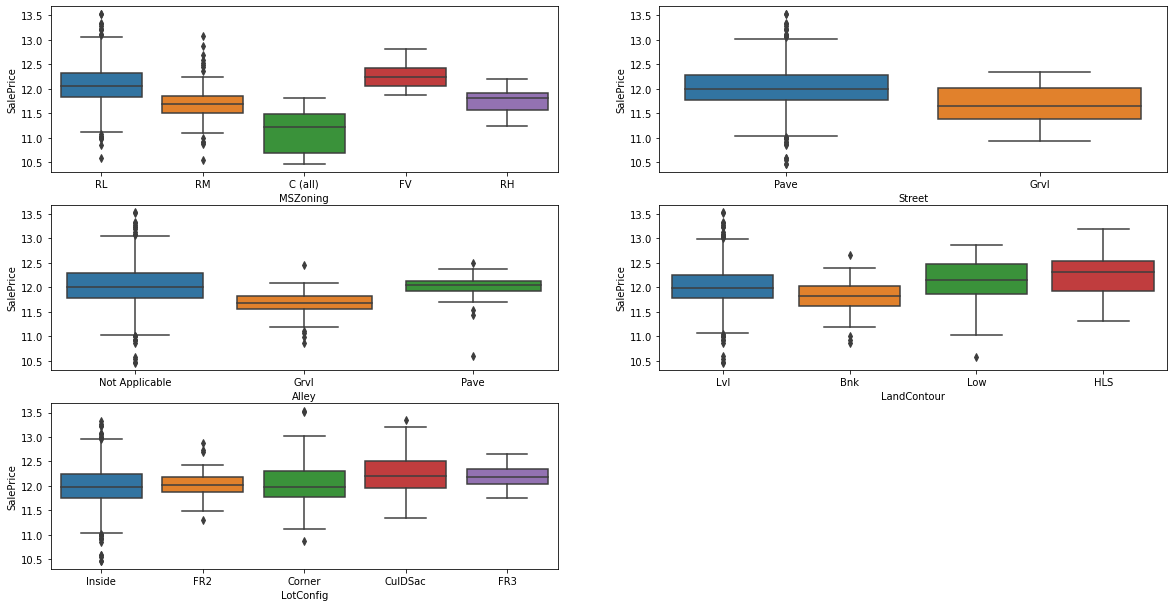

In [56]:
draw_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig'])

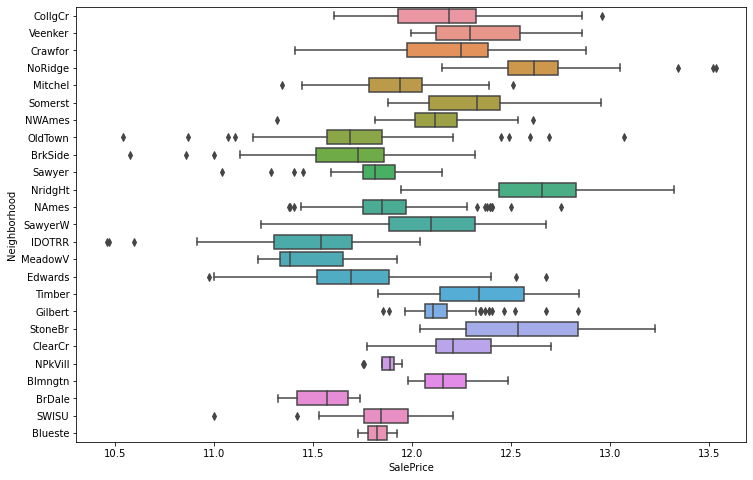

In [57]:
plt.figure(figsize=(12, 8))
sns.boxplot(housing['SalePrice'], housing['Neighborhood'])
plt.show()

*Observations:*
- Residential low density and Floating Village Residential areas sell at higher prices.
- Paved roads attract higher selling prices.
- Houses majorly have with no alley access & sell at higher prices.
- Australians prefer Hillside houses and properties with a depression. Houses with a banked contour are least preferred.
- Cul de sac properties sell at higher prices. Cornet plots come next.
- Houses in Northridge Heights, Stone Brook, Timberland, Northridge, Veenker attract higher prices while properties in Meadow Village, Iowa DOT and Rail Road and Briardale have low prices.

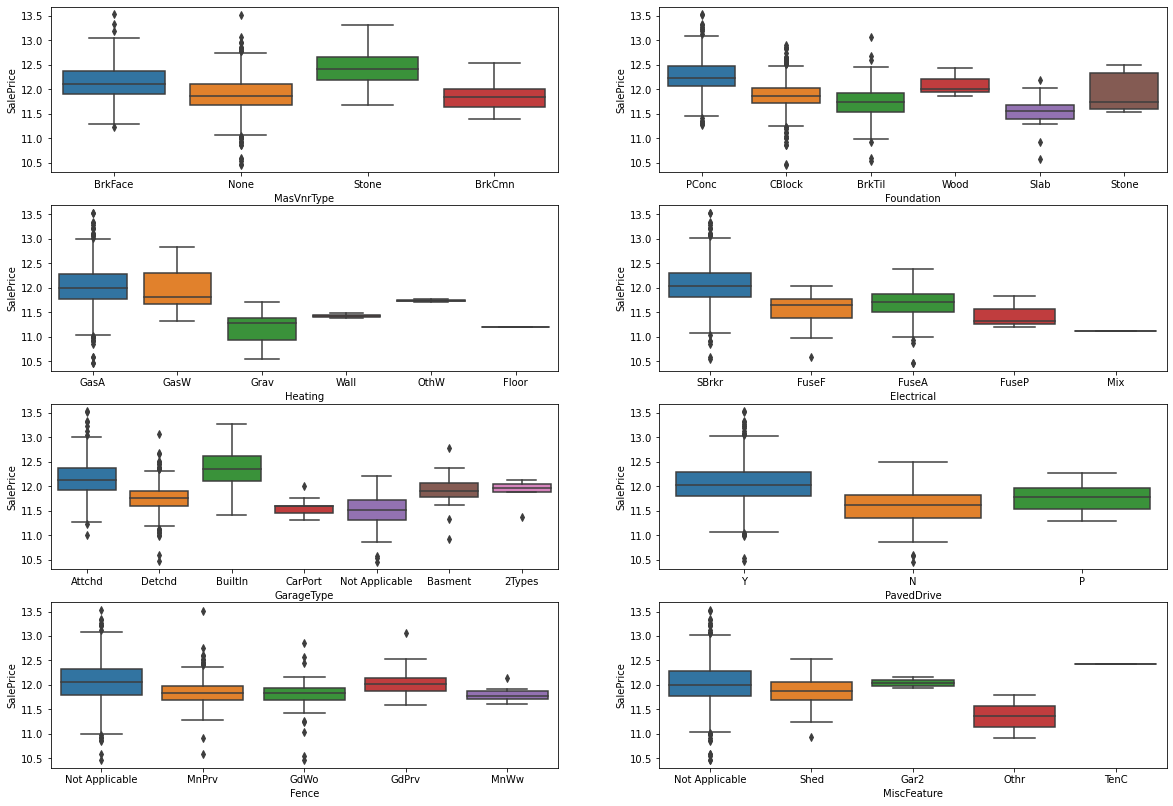

In [58]:
draw_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

*Observations:*
- Houses with stone veneer type have higher price while no veneer sell the lowest.
- Houses with poured concrete foundation and houses with GasA (air furnaced) or GasW(hot water/steam) and Standard Circuit Breakers sell at good prices.
- Properties with attached and built-in garages have higher SalePrice. Homes with paved driveways also sell at higher prices.
- Most properties have no fences or miscellaneous features & still sell at higher prices.

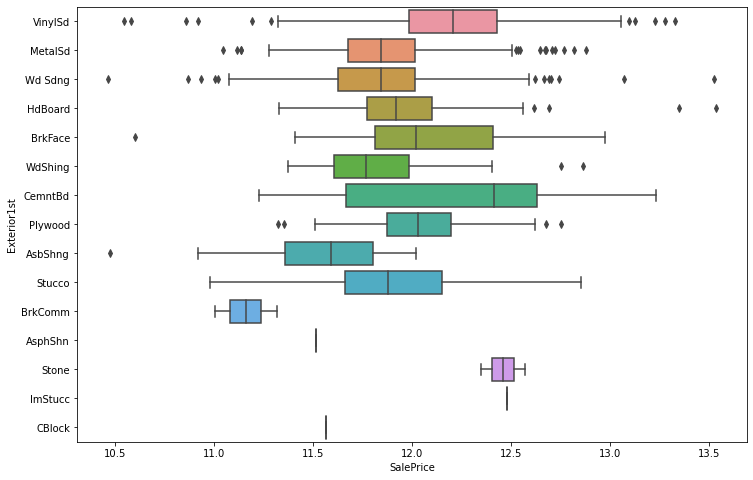

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(housing['SalePrice'], housing['Exterior1st'])
plt.show()

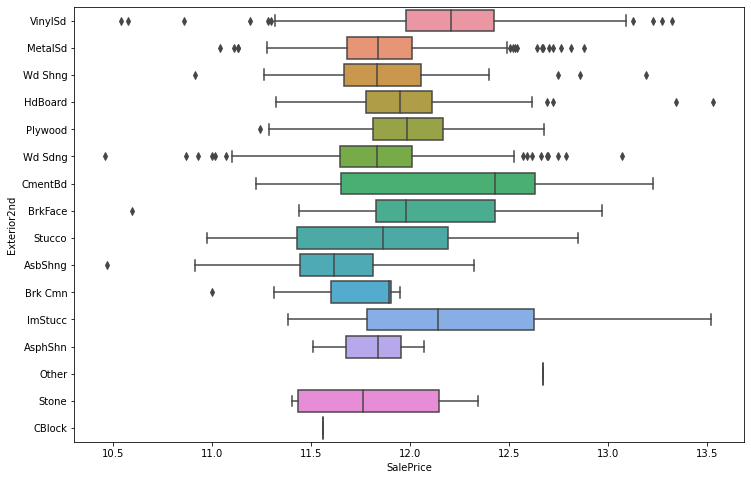

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(housing['SalePrice'], housing['Exterior2nd'])
plt.show()

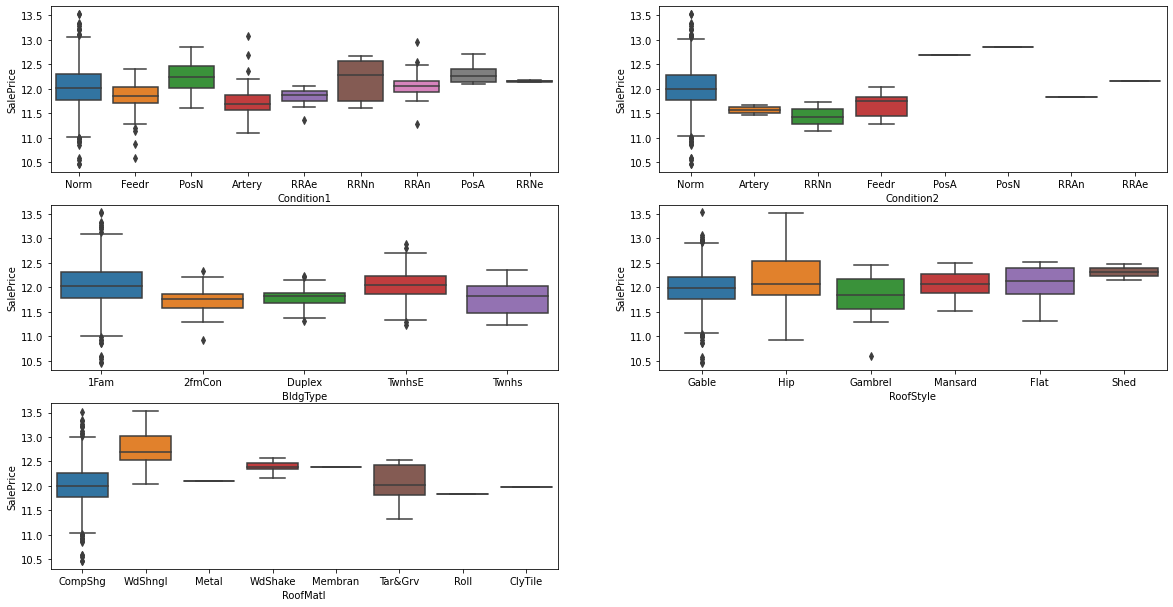

In [61]:
draw_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl'])

*Observations:*
- Houses with cement board exteriors are more widely dispersed.
- Houses with normal proximity conditions have higher SalePrice.
- Houses with Hip roofs sell at higher prices than other roof styles.
- Wood Shingle roofs sell at higher prices while roofs made of standard shingle sell at the lowest.


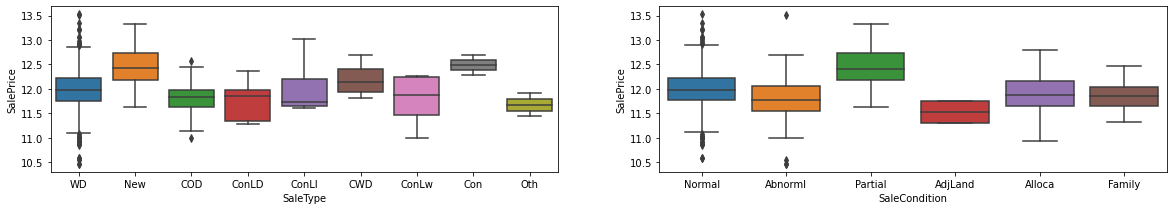

In [62]:
draw_boxplot(['SaleType','SaleCondition'])

*Observations:*
- Most of the houses are newly built (SaleType = New and SaleCondition = Partial) or with warranty deed have high SalePrice among other types.
- Homes with Normal sale have high SalePrice.

### Encoding

In [63]:
housing = pd.get_dummies(housing, columns = nominal_features, drop_first=True)

In [64]:
housing.shape

(1450, 187)

### Check for imbalance in data

From the above boxplots, we saw that for some cases one label was dominantly present over others. This indicates there is imbalance in the data set.  
Lets remove predictors with labels that have same value on 85% or more records

In [65]:
dummies_to_drop = []
for feature in housing.columns:
    if max(list(housing[feature].value_counts(normalize=True).sort_values(ascending=False).head(1)))>=0.95:
        dummies_to_drop.append(feature)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['Utilities', 'MSZoning_FV', 'MSZoning_RH', 'Street_Pave', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', '

In [66]:
housing = housing.drop(columns=dummies_to_drop)

In [67]:
housing.shape

(1450, 89)

## Model Building

### Splitting into Train and Test Data

In [68]:
y = housing.pop('SalePrice')
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1450, dtype: float64

In [69]:
X = housing
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageType_BuiltIn,GarageType_Detchd,GarageType_Not Applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not Applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,0,3,7,5.0,19,19,...,0,0,0,1,0,1,0,1,1,0
1,20,80.0,9600.0,3,0,0,6,7.5,46,46,...,0,0,0,1,0,1,0,1,1,0
2,60,68.0,11250.0,0,0,3,7,5.0,21,20,...,0,0,0,1,0,1,0,1,1,0
3,70,60.0,9550.0,0,0,3,7,5.0,107,52,...,0,1,0,1,0,1,0,1,0,0
4,60,84.0,14260.0,0,0,3,8,5.0,22,22,...,0,0,0,1,0,1,0,1,1,0


#### Dividing into X and Y sets for data modelling:

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [71]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1160, 88)
(1160,)
(290, 88)
(290,)


### Feature Scaling

In [72]:
# Identify numerical features
# Apply scaling only to numerical features
num_vars=X_train.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold'],
      dtype='object')

In [73]:
# Create scaler object
scaler = StandardScaler()

*As the penalty term depends upon the magnitude of each coefficient we need to standardise the data whenever working with Ridge/Lasso regression.*

In [74]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Linear regression model without Regularization

Let's predict sale prices using linear regression.

In [75]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

11.797899349496655
[-1.54727364e-02  1.34146571e-02  2.73316028e-02 -2.39287469e-03
 -5.05094983e-04  6.92655837e-03  8.35851608e-02  4.63830801e-02
 -3.90282477e-02 -9.67149293e-03  4.89003733e-04  7.14708019e-03
 -4.54786300e-03  3.78089655e-04  7.17928602e-03  1.08951269e-02
  2.32014595e-03  4.90256347e-02  7.88351118e-03  2.19061834e-02
  8.07813267e-03  1.17119099e-02  1.20565198e-01  1.10229419e-01
  2.09059513e-02  1.42964676e-02  1.54634222e-02 -4.49189860e-03
  1.37297344e-02  3.01023960e-03 -2.47448322e-02  1.50672313e-02
  1.98078836e-06  5.17376202e-03  1.17523024e-02  1.81993890e-02
  5.78730780e-03  7.52929594e-03  8.58000666e-03 -9.29137478e-04
  6.49091120e-03  6.09189764e-02  1.84330044e-02 -1.30508235e-02
 -2.42889351e-02  4.16232529e-02 -2.75766686e-03 -1.26886207e-02
 -3.59359267e-02 -1.71794391e-02 -1.57047672e-02 -4.65451760e-02
  3.27117331e-02 -3.21473711e-02 -1.22068452e-02  7.57141599e-02
  3.42322407e-02  6.57454016e-02  3.98734572e-02 -5.78186201e-02
 -4.04

In [77]:
#Predict the targe tvariable using this model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# Calculate the metrics
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr 0.9263554742243286
r2_test_lr 0.868790934285228
rss1_lr 13.608746480262399
rss2_lr 6.115941119832014
mse_train_lr 0.011731678000226205
mse_test_lr 0.021089452137351774


#### Residual Aanlysis

Text(0, 0.5, 'residuals')

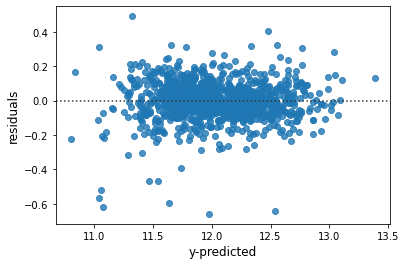

In [78]:
sns.residplot(y_pred_train, y_train - y_pred_train) 
plt.xlabel('y-predicted', fontsize = 12)
plt.ylabel('residuals', fontsize = 12)

*No pattern detected this indicates there is independence of errors & homoscedasticity*

Check if residuals are normally distributed

Text(0.5, 0, 'residuals')

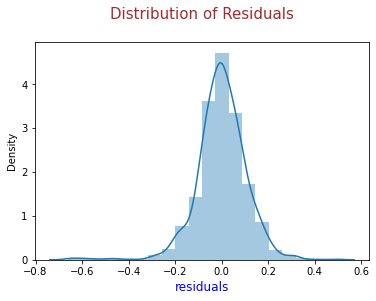

In [79]:
sns.distplot((y_train - y_pred_train), bins = 20)

# Giving Title to the chart
plt.title('Distribution of Residuals\n',
          fontdict={'fontsize': 15, 'fontweight': 5, 'color': 'brown'})
# Adding labels to Axes
plt.xlabel('residuals', fontdict={
           'fontsize': 12, 'fontweight': 5, 'color': 'blue'})

*Error terms are normally distributed with mean = 0*

### Ridge Regression

In [80]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

# Instantiate Ridge regression
ridge = Ridge()

# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Ridge model results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005968,0.001808,0.002514,0.001042,0.0001,{'alpha': 0.0001},-0.084135,-0.088511,-0.090064,-0.080367,...,-0.086769,0.003945,25,-0.076418,-0.076956,-0.075891,-0.078639,-0.075402,-0.076661,0.001117
1,0.004840,0.001219,0.003243,0.000706,0.001,{'alpha': 0.001},-0.084134,-0.088506,-0.090063,-0.080366,...,-0.086768,0.003945,24,-0.076417,-0.076957,-0.075891,-0.078639,-0.075402,-0.076661,0.001117
2,0.005785,0.001465,0.003391,0.001019,0.01,{'alpha': 0.01},-0.084130,-0.088458,-0.090059,-0.080361,...,-0.086753,0.003940,23,-0.076417,-0.076973,-0.075889,-0.078637,-0.075402,-0.076664,0.001117
3,0.005218,0.001333,0.002592,0.000798,0.05,{'alpha': 0.05},-0.084110,-0.088267,-0.090039,-0.080337,...,-0.086691,0.003920,22,-0.076415,-0.077038,-0.075883,-0.078630,-0.075403,-0.076674,0.001120
4,0.005164,0.000744,0.002598,0.000495,0.1,{'alpha': 0.1},-0.084087,-0.088067,-0.090014,-0.080307,...,-0.086623,0.003900,21,-0.076412,-0.077109,-0.075878,-0.078622,-0.075403,-0.076685,0.001122


In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


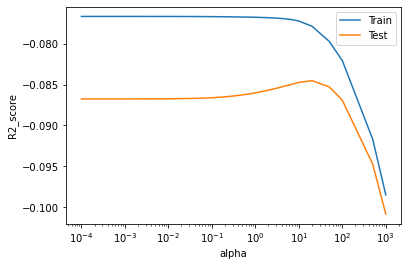

In [83]:
#plotting R2 score vs alpha value
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label='Train')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [84]:
model_cv.best_params_['alpha'] 
# we can see from the graph above that the R-square of train & test comes closer between 10 and 50

20

In [85]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha'] #20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.00978853  0.01275787  0.02690808 -0.0035235   0.00132736  0.00413473
  0.08300579  0.04535078 -0.03548446 -0.0107586   0.00208328  0.01243425
 -0.0038485   0.00571301  0.00473356  0.0113574   0.00305838  0.0474537
  0.00765231  0.02049643  0.00983557  0.01287531  0.1086604   0.09445215
  0.01897056  0.01779054  0.01828426 -0.00247722  0.0140523   0.0076379
 -0.02362908  0.0135585   0.00571708  0.00643605  0.0161083   0.01409357
  0.00402094  0.00826225  0.00910542 -0.00094584  0.00639453  0.02583454
 -0.01457327 -0.01040595 -0.01879339  0.03151917 -0.00501108 -0.00873915
 -0.02141151 -0.01645755 -0.00543196 -0.03070788  0.02156779 -0.02236526
 -0.00646751  0.03569833  0.0075661   0.04857167  0.021107   -0.02435282
 -0.00493859 -0.02716958  0.00489546 -0.01712472  0.00396825 -0.03096411
 -0.00175846  0.00021961 -0.00128318 -0.01220409  0.00664272 -0.00350541
  0.01008884  0.02229622 -0.01565453  0.02352467 -0.00430754  0.01645772
  0.00847019  0.01555663  0.00390068  0.026287    0.0

In [86]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr 0.923917451322263
r2_test_lr 0.8746999647151552
rss1_lr 14.059267890208748
rss2_lr 5.840508305888414
mse_train_lr 0.012120058526042024
mse_test_lr 0.020139683813408325


### Lasso Regression

In [87]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

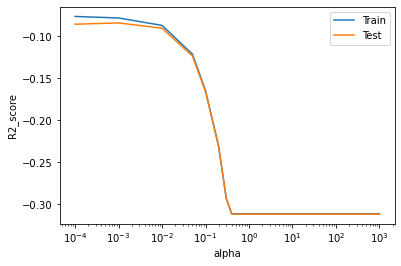

In [88]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()
#plotting R2 score vs alpha value
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'], label='Train')
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

In [89]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
# we can see from the graph above that the R-square of train & test comes closer at 0.001.

{'alpha': 0.001}


In [90]:
# Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha'] #0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [91]:
lasso.coef_

array([-0.00399511,  0.01014284,  0.02656708, -0.00405295,  0.00277073,
       -0.        ,  0.08830438,  0.04493085, -0.03959891, -0.00777682,
        0.        ,  0.01391792, -0.0035624 ,  0.00844818,  0.0043006 ,
        0.0105573 ,  0.00087753,  0.04495923,  0.00579748,  0.01501265,
        0.01130245,  0.01193076,  0.12271921,  0.10508839,  0.01765093,
        0.01044835,  0.01355857, -0.00078058,  0.01422967,  0.        ,
       -0.02384328,  0.01068658,  0.00710776,  0.00621537,  0.01672641,
        0.01404198,  0.00556682,  0.00695697,  0.00769061, -0.        ,
        0.00457036,  0.01582773, -0.02002556, -0.        , -0.01072344,
        0.0207246 , -0.00215619, -0.        , -0.00462586, -0.        ,
        0.        , -0.01491763,  0.01142614, -0.00344874, -0.        ,
        0.03294853,  0.        ,  0.04772423,  0.        , -0.01335828,
        0.        , -0.01431831,  0.00638613, -0.        ,  0.        ,
       -0.01569297, -0.        ,  0.        , -0.        , -0.  

In [92]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr 0.9220225077800277
r2_test_lr 0.8733374720301825
rss1_lr 14.409433852839038
rss2_lr 5.904017065684094
mse_train_lr 0.012421925735206068
mse_test_lr 0.020358679536841704


In [93]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
                       'MSE (Train)', 'MSE (Test)'],
            'Linear Regression': metric
            }

lr_metric = pd.DataFrame(lr_table, columns=['Metric', 'Linear Regression'])

rg_metric = pd.Series(metric2, name='Ridge (λ = 20.0)')
ls_metric = pd.Series(metric3, name='Lasso (λ = 0.001)')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)

final_metric

,Metric,Linear Regression,Ridge (λ = 20.0),Lasso (λ = 0.001)
0,R2 Score (Train),0.926355,0.923917,0.922023
1,R2 Score (Test),0.868791,0.874700,0.873337
2,RSS (Train),13.608746,14.059268,14.409434
3,RSS (Test),6.115941,5.840508,5.904017
4,MSE (Train),0.108313,0.110091,0.111454
5,MSE (Test),0.145222,0.141914,0.142684


Overall we have a decent model.

### Changes in the coefficients after regularization

In [94]:
betas = pd.DataFrame(index=X.columns)

In [95]:
betas.rows = X.columns

In [96]:
betas['Linear'] = lm.coef_
betas['Ridge (λ = 20.0)'] = ridge.coef_
betas['Lasso (λ = 0.001)'] = lasso.coef_

In [97]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge (λ = 20.0),Lasso (λ = 0.001)
MSSubClass,-0.015473,-0.009789,-0.003995
LotFrontage,0.013415,0.012758,0.010143
LotArea,0.027332,0.026908,0.026567
LotShape,-0.002393,-0.003524,-0.004053
LandSlope,-0.000505,0.001327,0.002771
HouseStyle,0.006927,0.004135,-0.000000
OverallQual,0.083585,0.083006,0.088304
OverallCond,0.046383,0.045351,0.044931
YearBuilt,-0.039028,-0.035484,-0.039599
YearRemodAdd,-0.009671,-0.010759,-0.007777


## Final Model

I pick the **Ridge model** as the final model.

*Here Ridge & Lasso models have very little difference in values of R-squared or MSE in both test & train data sets. As the R-squared value hasn't gone up after feature selection using the Lasso model, it's evident that most predictors do impact the response variable here. So Ridge is a better fit.*

##### Top predictor variables:

In [98]:
# positive co-efficients
list(betas['Ridge (λ = 20.0)'].sort_values(ascending=False).head(5).index)

['1stFlrSF', '2ndFlrSF', 'OverallQual', 'SaleCondition_Normal', 'SaleType_New']

In [99]:
# negative co-efficients
list(betas[betas['Ridge (λ = 20.0)'] < 0]['Ridge (λ = 20.0)'].sort_values().head(5).index)

['YearBuilt',
 'Exterior1st_Wd Sdng',
 'Neighborhood_NWAmes',
 'Exterior1st_HdBoard',
 'RoofStyle_Gable']

## Summary

**Top 5 positive predictor variables:** *'1stFlrSF', '2ndFlrSF', 'OverallQual', 'SaleCondition_Normal', 'SaleType_New'*

**Top 3 negative predictor variables**: *'YearBuilt', 'Exterior1st_Wd Sdng', 'Neighborhood_NWAmes'*

These variables are significant in predicting the price of a house in Australia - 

- *People prefer living in first and second floor - bigger lot area, higher the price.*  
- *Newly built houses have higher selling rates. As the age increases of a house, lower its value becomes.*  
- *Better the overall quality (overall material and finish of the house) of a house also drives up the price.*
- *Houses with normal sales condition sell at better rates while homes with deductions or damages sell at lower prices..*
- *Homes in Residential Medium density sell at lower prices.*
- *Roofs made of wood siding or shingles were sold at low prices.*
- *Location of the house determines its selling price - houses in Northridge Heights, Stone Brook, Timberland, Northridge, Veenker attract higher prices while properties in Meadow Village, Iowa DOT and Rail Road and Briardale were sold at much lower prices.*

## Problem Statement - Part II

#### *What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?*

Ridge: λ from 20 to 40

In [100]:
#Fitting Ridge model for alpha = 40 
alpha = 20*2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# print(ridge.coef_)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('\n\nr2_train_lr', r2_train_lr)
metric2_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric2_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric2_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric2_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric2_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric2_2.append(mse_test_lr**0.5)



r2_train_lr 0.9219823156561526
r2_test_lr 0.8745405391379308
rss1_lr 14.416860941527027
rss2_lr 5.847939480235917
mse_train_lr 0.012428328397868126
mse_test_lr 0.020165308552537644


Lasso: λ from 0.001 to 0.002

In [101]:
alpha = 0.001*2
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)


# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric3_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric3_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric3_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric3_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric3_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric3_2.append(mse_test_lr**0.5)

r2_train_lr 0.917561944820846
r2_test_lr 0.8723775673018259
rss1_lr 15.23369974132694
rss2_lr 5.948760321550571
mse_train_lr 0.013132499777005983
mse_test_lr 0.020512966626036452


Metrics

In [102]:
rg_metric_40 = pd.Series(metric2_2, name='Ridge: λ = 40')
ls_metric_002 = pd.Series(metric3_2, name='Lasso: λ = 0.002')

final_metric2 = pd.concat(
    [lr_metric, rg_metric, ls_metric, rg_metric_40, ls_metric_002], axis=1)
final_metric2

,Metric,Linear Regression,Ridge (λ = 20.0),Lasso (λ = 0.001),Ridge: λ = 40,Lasso: λ = 0.002
0,R2 Score (Train),0.926355,0.923917,0.922023,0.921982,0.917562
1,R2 Score (Test),0.868791,0.874700,0.873337,0.874541,0.872378
2,RSS (Train),13.608746,14.059268,14.409434,14.416861,15.233700
3,RSS (Test),6.115941,5.840508,5.904017,5.847939,5.948760
4,MSE (Train),0.108313,0.110091,0.111454,0.111482,0.114597
5,MSE (Test),0.145222,0.141914,0.142684,0.142005,0.143223


Co-efficients

In [103]:
betas['Ridge (λ = 40.0)'] = ridge.coef_
betas['Lasso (λ = 0.002)'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge (λ = 20.0),Lasso (λ = 0.001),Ridge (λ = 40.0),Lasso (λ = 0.002)
MSSubClass,-0.015473,-0.009789,-0.003995,-0.007482,-0.003350
LotFrontage,0.013415,0.012758,0.010143,0.012595,0.008218
LotArea,0.027332,0.026908,0.026567,0.027009,0.028487
LotShape,-0.002393,-0.003524,-0.004053,-0.004230,-0.004902
LandSlope,-0.000505,0.001327,0.002771,0.002823,0.004816
HouseStyle,0.006927,0.004135,-0.000000,0.002859,-0.000000
OverallQual,0.083585,0.083006,0.088304,0.081453,0.091248
OverallCond,0.046383,0.045351,0.044931,0.043686,0.042570
YearBuilt,-0.039028,-0.035484,-0.039599,-0.032529,-0.043581
YearRemodAdd,-0.009671,-0.010759,-0.007777,-0.011797,-0.008392


In [104]:
list(betas['Ridge (λ = 20.0)'].sort_values(ascending=False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleCondition_Normal',
 'SaleType_New',
 'Condition1_Norm',
 'BsmtFinSF1',
 'OverallCond',
 'Neighborhood_Somerst',
 'LotConfig_CulDSac']

In [105]:
list(betas['Ridge (λ = 40.0)'].sort_values(ascending=False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleCondition_Normal',
 'BsmtFinSF1',
 'OverallCond',
 'Condition1_Norm',
 'SaleType_New',
 'LotArea',
 'Neighborhood_Somerst']

In [106]:
list(betas['Lasso (λ = 0.001)'].sort_values(ascending=False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'SaleType_New',
 'OverallQual',
 'SaleCondition_Normal',
 'Condition1_Norm',
 'BsmtFinSF1',
 'OverallCond',
 'Neighborhood_Somerst',
 'LotArea']

In [107]:
list(betas['Lasso (λ = 0.002)'].sort_values(ascending=False).head(10).index)

['1stFlrSF',
 '2ndFlrSF',
 'OverallQual',
 'SaleType_New',
 'OverallCond',
 'BsmtFinSF1',
 'Condition1_Norm',
 'SaleCondition_Normal',
 'LotArea',
 'Foundation_PConc']

#### Drop five most important predictor variables in the lasso 

In [108]:
# positive co-efficients
list(betas['Lasso (λ = 0.001)'].sort_values(ascending=False).head(5).index)

['1stFlrSF', '2ndFlrSF', 'SaleType_New', 'OverallQual', 'SaleCondition_Normal']

In [109]:
X_train_new = X_train.drop(columns=['1stFlrSF', '2ndFlrSF', 'SaleType_New', 'OverallQual', 'SaleCondition_Normal'])

In [110]:
X_test_new = X_test.drop(columns=['1stFlrSF', '2ndFlrSF', 'SaleType_New', 'OverallQual', 'SaleCondition_Normal'])

In [111]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018215,0.006756,0.003591,7.983331e-04,0.0001,{'alpha': 0.0001},-0.105638,-0.099707,-0.109347,-0.093043,...,-0.105432,0.008916,2,-0.095600,-0.098214,-0.095372,-0.098641,-0.092687,-0.096103,0.002161
1,0.006781,0.000399,0.001995,9.536743e-08,0.001,{'alpha': 0.001},-0.105814,-0.100709,-0.111432,-0.090898,...,-0.105297,0.009149,1,-0.096578,-0.100255,-0.097164,-0.100980,-0.094563,-0.097908,0.002386
2,0.006914,0.001713,0.002793,7.463530e-04,0.01,{'alpha': 0.01},-0.112864,-0.101068,-0.117347,-0.095325,...,-0.110370,0.010854,3,-0.106158,-0.108939,-0.105163,-0.110427,-0.103055,-0.106748,0.002639
3,0.004588,0.000489,0.002002,1.481146e-05,0.05,{'alpha': 0.05},-0.137210,-0.120115,-0.134186,-0.121379,...,-0.131643,0.009622,4,-0.128903,-0.130590,-0.127954,-0.132025,-0.125900,-0.129075,0.002115
4,0.004420,0.000466,0.002596,7.186672e-04,0.1,{'alpha': 0.1},-0.182477,-0.158841,-0.172187,-0.165597,...,-0.171931,0.008912,5,-0.170009,-0.169768,-0.168846,-0.172968,-0.166215,-0.169561,0.002171


In [113]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [114]:
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [115]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3_3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr', r2_train_lr)
metric3_3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr', r2_test_lr)
metric3_3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr', rss1_lr)
metric3_3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr', rss2_lr)
metric3_3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr', mse_train_lr)
metric3_3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr', mse_test_lr)
metric3_3.append(mse_test_lr**0.5)

r2_train_lr 0.8859332850446482
r2_test_lr 0.8413091586862458
rss1_lr 21.07834885639995
rss2_lr 7.396926702011101
mse_train_lr 0.01817099039344823
mse_test_lr 0.02550664380003828


In [116]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
BsmtFinSF1,0.091572
BsmtUnfSF,0.061481
TotRmsAbvGrd,0.061242
FullBath,0.053369
OverallCond,0.050753


In [117]:
list(model_coeff.sort_values(by='Lasso', ascending=False).head(5).index)

['BsmtFinSF1', 'BsmtUnfSF', 'TotRmsAbvGrd', 'FullBath', 'OverallCond']

In [118]:
lr_table = {'Metric': ['R2 Score (Train)', 'R2 Score (Test)', 'RSS (Train)', 'RSS (Test)',
                       'MSE (Train)', 'MSE (Test)']}

lr_metric = pd.DataFrame(lr_table, columns=['Metric'])

In [119]:
ls_metric_002 = pd.Series(metric3_2, name='Lasso: λ = 0.002')
ls_metric_003 = pd.Series(metric3_3, name='Lasso:  drop 5 var')

final_metric3 = pd.concat(
    [lr_metric, ls_metric_002, ls_metric_003], axis=1)
final_metric3

,Metric,Lasso: λ = 0.002,Lasso: drop 5 var
0,R2 Score (Train),0.917562,0.885933
1,R2 Score (Test),0.872378,0.841309
2,RSS (Train),15.233700,21.078349
3,RSS (Test),5.948760,7.396927
4,MSE (Train),0.114597,0.134800
5,MSE (Test),0.143223,0.159708
